In [1]:
# first level direction: alwasy left
# generate clock wise
def xy2d(n, x, y):
    d = 0
    s = int(n / 2)
    while s > 0:
        rx = (x & s) > 0
        ry = (y & s) > 0
        if rx == 0 and ry == 0:
            d += 0
        if rx == 1 and ry == 0:
            d += s*s
        if rx == 1 and ry == 1:
            d += s*s*2
        if rx == 0 and ry == 1:
            d += s*s*3   
#         d += s * s * ((3 * rx) ^ ry)
        x,y = rot(s, x, y, rx, ry)
        s = int(s/2)
    return d

# def d2xy(n, d):
#     t = d
#     x = 0
#     y = 0
#     s = 1
#     while s < n:
#         rx = 1 & int(t/2)
#         ry = 1 & (t^rx)
#         x,y = rot(s, x, y, rx, ry)
#         x += s * rx
#         y += s * ry
#         t = int(t/4)
#         s *= 2
#     return x, y

def rot(n, x, y, rx, ry):
    if rx == 0 : # the upper level direction remains the same, so only change the lower level
        if ry == 1 :
            x = n-1 - x
            y = n-1 - y
        t  = x
        x = y
        y = t
    return x, y

# ===== Testing =====
# for i in range(8):
#     for j in range(8):
#         print(xy2d(8, i, j))

In [2]:
# import ipdb
# ipdb.set_trace()
# print(xy2d(1<<14, 2506754>>8, 3194880>>8))
# print(xy2d(1<<14, 2818050>>8, 1785859>>8))
# print(xy2d(1<<14, 2506756>>8, 3194880>>8))

In [3]:
from enum import Enum
class Direction(Enum):
    UP = 0
    LEFT = 1
    RIGHT = 2
    DOWN = 3

class ClockDirection(Enum):
    CLOCKWISE = 0
    COUNTERCLOCKWISE = 1
    UNAVAILABLE = 2

class Quadrant(Enum):
    LOWERLEFT = 0
    LOWERRIGHT = 1
    UPPERRIGHT = 2
    UPPERLEFT = 3
    
next_level_direction=[[Direction.UP, Direction.UP, Direction.RIGHT, Direction.LEFT],
                      [Direction.DOWN, Direction.LEFT, Direction.LEFT, Direction.UP],
                      [Direction.RIGHT, Direction.DOWN, Direction.UP, Direction.RIGHT],
                      [Direction.LEFT, Direction.RIGHT, Direction.DOWN, Direction.DOWN]]

next_level_clock_direction = [[ClockDirection.CLOCKWISE,ClockDirection.COUNTERCLOCKWISE,ClockDirection.COUNTERCLOCKWISE,ClockDirection.UNAVAILABLE],
                           [ClockDirection.CLOCKWISE,ClockDirection.COUNTERCLOCKWISE,ClockDirection.UNAVAILABLE,ClockDirection.CLOCKWISE],
                           [ClockDirection.CLOCKWISE,ClockDirection.UNAVAILABLE,ClockDirection.COUNTERCLOCKWISE,ClockDirection.CLOCKWISE],
                           [ClockDirection.UNAVAILABLE,ClockDirection.COUNTERCLOCKWISE,ClockDirection.COUNTERCLOCKWISE,ClockDirection.CLOCKWISE]]

# ===== Testing =====
# for i in range(4):
#     for j in range(4):
#         print(next_level_direction[i][j])
# vard = Direction.UP
# if vard.name == "UP":
#     print("yes") # yes
# print(vard.name)
# print(vard.value)
# if vard == Direction.UP:
#     print("yes")
# for dir in Direction:
#     print(dir)

In [4]:
# dictionary for interval:
# lower_x
# upper_X
# lower_y
# upper_y
# lower_hilbert
# upper_hilbert


def range_decompose(max_bits, current_bits, down_x, up_x, down_y, up_y, center_x, center_y, pre_dir, this_dir, intervals):
    
    # if there is only 1 element here
    if current_bits == 0:
#         print("reach here!!!!!!!!")
        hvalue = xy2d(1<<max_bits, down_x, down_y)
        interval = {"lower_x":down_x, "upper_x":up_x, "lower_y":down_y,"upper_y":up_y,"lower_hilbert":hvalue,"upper_hilbert":hvalue}
        intervals.append(interval);
        return
    
    half_region = 1 << (current_bits - 1)
    clock_dir = next_level_clock_direction[pre_dir.value][this_dir.value]
    if current_bits == max_bits:
        clocl_dir = ClockDirection.COUNTERCLOCKWISE
        
    # check if the range contains the entire  region
    if down_x == center_x - half_region and down_y == center_y - half_region and up_x == center_x + half_region-1 and up_y == center_y + half_region-1:
        # if yes, return this region as an interval
        lower_x = 0
        upper_x = 0
        lower_y = 0
        upper_y = 0
        if clock_dir.name == "CLOCKWISE":
            if this_dir.name == "UP":
                lower_x = up_x
                upper_x = down_x
                lower_y = up_y
                upper_y = up_y
            elif this_dir.name == "LEFT":
                lower_x = down_x
                upper_x = down_x
                lower_y = up_y
                upper_y = down_y
            elif this_dir.name == "RIGHT":
                lower_x = up_x
                upper_x = up_x
                lower_y = down_y
                upper_y = up_y
            elif this_dir.name == "DOWN":
                lower_x = down_x
                upper_x = up_x
                lower_y = down_y
                upper_y = down_y
        elif clock_dir.name == "COUNTERCLOCKWISE":
            if this_dir.name == "UP":
                lower_x = down_x
                upper_x = up_x
                lower_y = up_y
                upper_y = up_y
            elif this_dir.name == "LEFT":
                lower_x = down_x
                upper_x = down_x
                lower_y = down_y
                upper_y = up_y
            elif this_dir.name == "RIGHT":
                lower_x = up_x
                upper_x = up_x
                lower_y = up_y
                upper_y = down_y
            elif this_dir.name == "DOWN":
                lower_x = up_x
                upper_x = down_x
                lower_y = down_y
                upper_y = down_y
                
        lowhvalue = xy2d(1<<max_bits,lower_x,lower_y)
        uphvalue = xy2d(1<<max_bits,upper_x,upper_y)
        interval = {"lower_x":lower_x, "upper_x":upper_x, "lower_y":lower_y,"upper_y":upper_y,"lower_hilbert":lowhvalue,"upper_hilbert":uphvalue}
        intervals.append(interval)
    else:
        # if not, further decompose it
        current_bits -= 1
        if current_bits <= 0:
            half_region = 0
        else:
            half_region = 1 << (current_bits - 1)
        
        if clock_dir.name == "CLOCKWISE":
            if this_dir.name == "UP":
                parent_dir = Direction.UP
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and down_y < center_y: # lower left\
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
            elif this_dir.name == "LEFT":
                parent_dir = Direction.LEFT
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and down_y < center_y: # lower left\
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)
            elif this_dir.name == "RIGHT":
                parent_dir = Direction.RIGHT
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and down_y < center_y: # lower left\
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
            elif this_dir.name == "DOWN":
                parent_dir = Direction.DOWN
                if down_x < center_x and down_y < center_y: # lower left\
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
        elif clock_dir.name == "COUNTERCLOCKWISE":
            if this_dir.name == "UP":
                parent_dir = Direction.UP
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and down_y < center_y: # lower left\
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
            elif this_dir.name == "LEFT":
                parent_dir = Direction.LEFT
                if down_x < center_x and down_y < center_y: # lower left
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
            elif this_dir.name == "RIGHT":
                parent_dir = Direction.RIGHT
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and down_y < center_y: # lower left
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
            elif this_dir.name == "DOWN":
                parent_dir = Direction.DOWN
                if up_x >= center_x and down_y < center_y: # lower right
                    quad = Quadrant.LOWERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, down_y, min(center_y-1,up_y), center_x+half_region, center_y-half_region, parent_dir, child_dir, intervals)
                if up_x >= center_x and up_y >= center_y: # upper right
                    quad = Quadrant.UPPERRIGHT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, max(center_x,down_x), up_x, max(center_y,down_y), up_y, center_x+half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and up_y >= center_y: # upper left
                    quad = Quadrant.UPPERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), max(center_y,down_y), up_y, center_x-half_region, center_y+half_region, parent_dir, child_dir, intervals)
                if down_x < center_x and down_y < center_y: # lower left
                    quad = Quadrant.LOWERLEFT
                    child_dir = next_level_direction[parent_dir.value][quad.value]
                    range_decompose(max_bits, current_bits, down_x, min(center_x-1,up_x), down_y, min(center_y-1,up_y), center_x-half_region, center_y-half_region, parent_dir, child_dir, intervals)

# ===== Testing =====
# intervals = []
# range_decompose(3,3,2,4,2,4,4,4,Direction.LEFT,Direction.LEFT,intervals)
# range_decompose(3,0,2,4,2,4,4,4,Direction.LEFT,Direction.LEFT,intervals)
# range_decompose(3,1,2,3,2,3,3,3,Direction.LEFT,Direction.LEFT,intervals)
# range_decompose(3,1,2,3,2,3,3,3,Direction.DOWN,Direction.DOWN,intervals)
# print(intervals)

# import ipdb
# ipdb.set_trace()
# intervals = []
# # range_decompose(5,5,8,15,8,23,16,16,Direction.LEFT,Direction.LEFT,intervals)
# range_decompose(6,6,32,34,32,43,32,32,Direction.LEFT,Direction.LEFT,intervals)
# print(intervals)
# print(len(intervals))
# intervals = intervals[0]
# print(intervals[0])
# print(intervals[0]["lower_x"])
# for inter in intervals:
#     print(intervals)

In [5]:
def merge_intervals(intervals):
    if len(intervals) <= 1:
        return intervals
    merged_intervals = []
    i = 0
    j = 0
    while i < len(intervals):
        temp_upper = intervals[i]["upper_hilbert"]
        j = 1
        while i+j < len(intervals) and intervals[i+j]["lower_hilbert"] == temp_upper + 1:
            temp_upper = intervals[i+j]["upper_hilbert"]
            j += 1
        interval = {"lower_x":intervals[i]["lower_x"], "upper_x":intervals[i+j-1]["upper_x"], 
                    "lower_y":intervals[i]["lower_y"],"upper_y":intervals[i+j-1]["upper_y"],
                    "lower_hilbert":intervals[i]["lower_hilbert"],"upper_hilbert":intervals[i+j-1]["upper_hilbert"]}
        merged_intervals.append(interval)
        i += j
    return merged_intervals

def get_intervals(lower_x, upper_x, lower_y, upper_y, max_bits = 22):
    intervals = []
    range_decompose(max_bits,max_bits,lower_x,upper_x,lower_y,upper_y,1<<(max_bits-1),1<<(max_bits-1),Direction.LEFT,Direction.LEFT,intervals)
    intervals = merge_intervals(intervals)
    return intervals
    
# ===== Testing =====
# import ipdb
# ipdb.set_trace()
#print(get_intervals(2,4,2,4))
# print(get_intervals(8,15,8,23,5))
# print(get_intervals(2097152,4194303,2097152,4194303,22))
# print(get_intervals(32,34,32,43,6))
# print(get_intervals(2,4,2,4,4))
# print(get_intervals(10,13,11,12,5))

In [6]:
# ===== Testing =====
# import ipdb
# ipdb.set_trace()
# intervals = []
# range_decompose(3,3,2,4,2,4,4,4,Direction.LEFT,Direction.LEFT,intervals)
# print(intervals)
# intervals = merge_intervals(intervals)
# print(intervals)

In [7]:
# print(xy2d(4194306, 1600000, 1900000))

In [8]:
import pandas as pd
df = pd.read_csv("./Data/HilbertSortedPOIs.csv")
print(df)
TOTAL = len(df)+1
COL = df.columns

# import numpy as np
# print(np.any(np.isnan(df))) # should be false
# print(np.all(np.isfinite(df))) # should be true
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# print(scaler.fit(df.iloc[:,0:5]))
# print(scaler.mean_)
# df.iloc[:,0:5]=scaler.transform(df.iloc[:,0:5])
# print(df)

# ===== Testing =====
# df1 = pd.DataFrame(data=[[-76.3099,22.4995,273802,2024995,17344470968016]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
# df1 = pd.DataFrame(data=[[-10,10,1600000,1900000,2819270465194]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
# print(df1)
# df1.iloc[0,:] = scaler.transform(df1.iloc[0,:].reshape(1,-1))
# print(df1)
# df[df.duplicated('hilbert')]

               x         y    x_     y_    hilbert    order  prediction
0       -83.8626 -160.3120   479    769     850940        0         NaN
1       -47.1500 -133.7760  3347   1805    7121756        1         NaN
2       -57.8599  -80.3684  2510   3891   12476251        2         NaN
3       -85.0511  -95.9735   386   3282   15937800        3         NaN
4       -85.0511  -96.0033   386   3281   15937805        4         NaN
5       -85.0494  -80.8804   386   3871   16564569        5         NaN
6       -66.5151  -39.3818  1834   5492   19274204        6         NaN
7       -66.5134  -39.3750  1834   5493   19274205        7         NaN
8       -82.2142   11.2500   608   7470   22919422        8         NaN
9       -76.3099   22.4995  1069   7910   23394509        9         NaN
10      -54.9371  -67.6341  2739   4389   32367030       10         NaN
11      -54.9356  -67.6150  2739   4390   32367033       11         NaN
12      -54.7994  -68.2801  2750   4364   32370444       12     

In [9]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# df.hist(column="hilbert",bins=100)
# plt.savefig("C:\\Users\\Cloud\\Desktop\\LearnIndex\\plot\\Distribution\\Hilbert_distribution.pdf", bbox_inches='tight')

In [22]:
from sklearn import linear_model
from sklearn import neural_network
from sklearn import ensemble
import ipdb
import time
stages = [1,10,100]
index = []
data = []

start_time=time.time()

for i in range(len(stages)):
    temp = []
    for j in range(stages[i]):
        df_ = pd.DataFrame(columns=COL)
        temp.append(df_)
    data.append(temp)
    
data[0][0] = df
nodatacount = 0

for i in range(len(stages)):
    temp = []
    print("======stage:"+str(i)+"======")
    
    for j in range(stages[i]):
        print("model:"+str(j))
        if len(data[i][j]) == 0:
            nodatacount += 1
            data[i][j] = data[i][j-1]
            print(j)
#         lr = linear_model.LinearRegression()
#         lr = linear_model.ElasticNet(max_iter=10000)
#         lr = linear_model.Lasso(max_iter=10000)
        lr = ensemble.GradientBoostingRegressor()
#         lr = ensemble.AdaBoostRegressor()
#         if i == 0:
#             lr = neural_network.MLPRegressor(hidden_layer_sizes=(8, 1),max_iter=1000)
# #             lr = ensemble.GradientBoostingRegressor(n_estimators=500)
#         else:
#             lr = linear_model.LinearRegression()
# #             lr = ensemble.GradientBoostingRegressor()
        train_x = data[i][j].iloc[:,4].reshape(-1,1)
#         train_x = data[i][j].iloc[:,0:5]
        train_y = data[i][j].iloc[:,5]
        lr.fit(train_x,train_y)
        temp.append(lr)
        # allocate data
        if i < len(stages)-1:
            predicted = lr.predict(train_x)
            for pi in range(len(predicted)): # do not change the prediction
                #print(item)
                if predicted[pi] < 0:
                    predicted[pi] = 0
                if predicted[pi] >= TOTAL:
                    predicted[pi] = TOTAL-1   
            ModelID = ((predicted/TOTAL)*stages[i+1]).astype(int)
            data[i][j].iloc[:,-1]=ModelID
#             if i == 1 and np.any(data[i][j]['prediction'] == 4):
#                 print(j)

            for k in range(stages[i+1]):
                data[i+1][k] = data[i+1][k].append(data[i][j].loc[data[i][j]['prediction'] == k])
    index.append(temp)

elapsed_time = time.time() - start_time
print(elapsed_time)
print(nodatacount)

======stage:0======
model:0


D:\anaconda\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


======stage:1======
model:0
model:1
model:2
model:3
model:4
model:5
model:6
model:7
model:8
model:9
======stage:2======
model:0
model:1
model:2
model:3
model:4
model:5
model:6
model:7
model:8
model:9
model:10
model:11
model:12
model:13
model:14
model:15
model:16
model:17
model:18
model:19
model:20
model:21
model:22
model:23
model:24
model:25
model:26
model:27
model:28
model:29
model:30
model:31
model:32
model:33
model:34
model:35
model:36
model:37
model:38
model:39
model:40
model:41
model:42
model:43
model:44
model:45
model:46
model:47
model:48
model:49
model:50
model:51
model:52
model:53
model:54
model:55
model:56
model:57
model:58
model:59
model:60
model:61
model:62
model:63
model:64
model:65
model:66
model:67
model:68
model:69
model:70
model:71
model:72
model:73
model:74
model:75
model:76
model:77
model:78
model:79
model:80
model:81
model:82
model:83
model:84
model:85
model:86
model:87
model:88
model:89
model:90
model:91
model:92
model:93
model:94
model:95
model:96
model:97
model:98

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


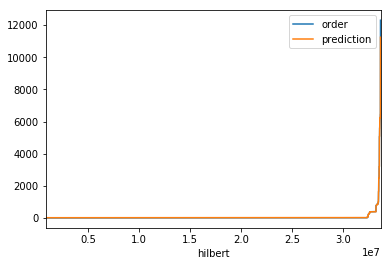

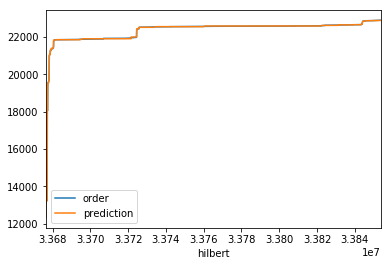

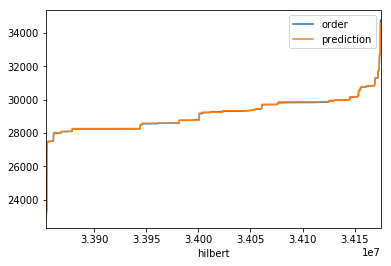

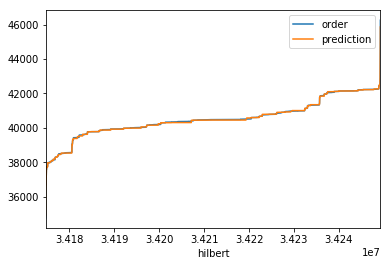

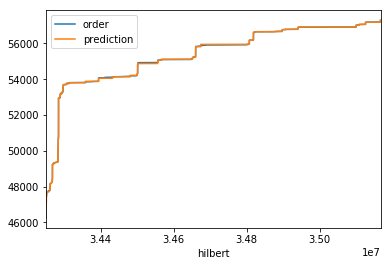

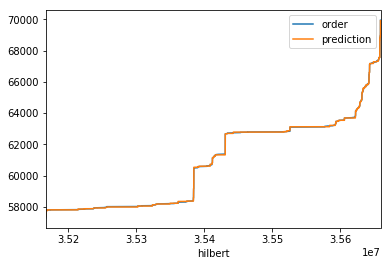

In [23]:
# look into leaf node's data
# print(data[2][0])

%matplotlib inline
import matplotlib.pyplot as plt
for i in range(6):
    data[2][i]['prediction']=index[2][i].predict(data[2][i]['hilbert'].reshape(-1, 1))
    data[2][i].plot(x='hilbert',y=['order','prediction'])
plt.show()
plt.show()

In [55]:
import numpy as np
# use the generated stage index for prediction
def predict_single_item_with_stage_model(model, data, total_size):
    tempy = 0
    modelIndex = 0
    for m in range(len(model)):
        tempy = model[m][modelIndex].predict(data)
#         tempy = model[m][modelIndex].predict(data.iloc[i,:].reshape(1,-1))
#         tempy = model[m][modelIndex].predict(data.iloc[i,])
        if tempy < 0:
            tempy = 0
        if tempy >= total_size:
            tempy = total_size-1
        if m < len(model)-1:
            modelIndex = int((tempy/total_size)*len(model[m+1]))
    return tempy

In [56]:
def find_discrepancy(lower_hilbert_value, upper_hilbert_value, lower_predicted_position, df):
    
    # return discrepancy, range cost, number of candidates, next record value, true lower and upper position
    
    predicted_lower_position_hilbert_value = df.iloc[lower_predicted_position,4]
#     if predicted_lower_position_hilbert_value - lower_hilbert_value == 0:
#         return 0
    
    shift = 0
    discrepancy = 0
    range_cost = 0
    number_of_results = 0
    next_record_hvalue = None
    true_lower_position = 0
    true_upper_position = 0
   

    # predicted lower position greater than the true lower position, search backward
    if predicted_lower_position_hilbert_value >= lower_hilbert_value:
        
        # the predicted lower position is even higher than the true upper position, will incur additional range search cost
        if predicted_lower_position_hilbert_value > upper_hilbert_value:
            while predicted_lower_position_hilbert_value > upper_hilbert_value:
                shift +=1
                discrepancy += 1
                range_cost += 1
                predicted_lower_position_hilbert_value = df.iloc[lower_predicted_position-shift,4]
            true_upper_position = lower_predicted_position - shift
            next_record_hvalue = df.iloc[true_upper_position+1,4]
            
            # retrieve records in this interval backwards, add range_cost
            shift = 0
            current_hilbert = df.iloc[true_upper_position, 4]
            while current_hilbert >= lower_hilbert_value:                                                                                                                                                                                                                                                                                               
                shift += 1
                discrepancy += 1
                range_cost += 1
                current_hilbert = df.iloc[true_upper_position-shift, 4]
            true_lower_position = true_upper_position-shift+1
            if true_lower_position > true_upper_position:
                number_of_results = 0
            else:
                number_of_results = true_upper_position - true_lower_position + 1
            return discrepancy, range_cost, number_of_results, next_record_hvalue, true_lower_position, true_upper_position
            
        else: # in the middle of the interval
            middle_position = lower_predicted_position
            while predicted_lower_position_hilbert_value >= lower_hilbert_value:
                shift += 1
                discrepancy += 1
                range_cost += 1
                predicted_lower_position_hilbert_value = df.iloc[lower_predicted_position-shift,4]
            true_lower_position = lower_predicted_position-shift+1
            
            shift = 0
            current_hilbert = df.iloc[middle_position, 4]
            while current_hilbert <= upper_hilbert_value:
                shift += 1
                range_cost += 1
                current_hilbert = df.iloc[middle_position+shift, 4]
            true_upper_position = middle_position + shift - 1
            if true_upper_position < true_lower_position:
                number_of_results = 0
            else:
                number_of_results = true_upper_position - true_lower_position + 1
                
            next_record_hvalue = df.iloc[true_upper_position+1,4]
            # notice the lower position should be larger or equal than the lower position
            return discrepancy, range_cost, number_of_results, next_record_hvalue, true_lower_position, true_upper_position
    
    else: # predicted lower position lower than the true lower position, search forward, incur addition range cost
        while predicted_lower_position_hilbert_value < lower_hilbert_value:
            shift += 1
            discrepancy += 1
            range_cost += 1
            predicted_lower_position_hilbert_value = df.iloc[lower_predicted_position+shift,4]
        
        true_lower_position = lower_predicted_position+shift
        
        # retrieve records in this interval forwards, add range_cost
        shift = 0
        current_hilbert = df.iloc[true_lower_position, 4]
        while current_hilbert <= upper_hilbert_value:
            shift += 1
            range_cost += 1
            current_hilbert = df.iloc[true_lower_position+shift, 4]
        true_upper_position = true_lower_position + shift - 1
        if true_upper_position < true_lower_position:
            number_of_results = 0
        else:
            number_of_results = true_upper_position - true_lower_position + 1
        
        next_record_hvalue = df.iloc[true_upper_position+1,4]
        return discrepancy, range_cost, number_of_results, next_record_hvalue, true_lower_position, true_upper_position

In [57]:
# ===== Testing =====
# import ipdb
# ipdb.set_trace()
# cost1 = find_discrepancy(-2.103575, df, 0)
# print(cost1)

In [58]:
def exact_search(lower_hilbert, upper_hilbert):
    return len(df[(df['hilbert'] >= lower_hilbert) & (df['hilbert'] <= upper_hilbert)])

In [59]:
def exact_search2(lower_hilbert, upper_hilbert):
    return df[(df['hilbert'] >= lower_hilbert) & (df['hilbert'] <= upper_hilbert)]

In [60]:
def exact_search3(lower_hilbert, upper_hilbert, lower_x, upper_x, lower_y, upper_y):
    # return number of candidates and number of results
#     len1 = len(df[(df['hilbert'] >= lower_hilbert) & (df['hilbert'] <= upper_hilbert)])
    len2 = len( df[(df['hilbert'] >= lower_hilbert) & (df['hilbert'] <= upper_hilbert) & (df['x'] >= lower_x) & (df['x'] <= upper_x) & (df['y'] >= lower_y) & (df['y'] <=upper_y)])
    return len2

In [61]:
def range_query(lower_x, upper_x, lower_y, upper_y,max_bits = 22, print_intervals = False, print_cost = False, model = None, df = None, scaler = None):
    lx = int((2*lower_x+180)*10000) >> 22-max_bits
    ly = int((lower_y+180)*10000) >> 22-max_bits
    ux = int((2*upper_x+180)*10000) >> 22-max_bits
    uy = int((upper_y+180)*10000) >> 22-max_bits
    
    intervals = get_intervals(lx,ux,ly,uy,max_bits)
    total_size = len(intervals)
    print("total intervals: ",total_size)
    if print_intervals:
        print(intervals)
    if print_cost:
        total_discrepancy = 0
        total_range_cost = 0
        total_number_of_results = 0 # candidates
        next_record_min_hvalue = None
        total_true_count = 0
        
#         frames = []
        number_of_ignored_intervals = 0
        optimized_range_cost = 0
        for interval in intervals:
            
            optimized_range_cost_flag = True
            
            if next_record_min_hvalue is not None and next_record_min_hvalue > interval["upper_hilbert"]:
                optimized_range_cost_flag = False
                number_of_ignored_intervals += 1
                
#             df1 = pd.DataFrame(data=[[0,0,interval["lower_x"],interval["lower_y"],interval["lower_hilbert"]]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
#             df1.iloc[0,:] = scaler.transform(df1.iloc[0,:].reshape(1,-1))
#             predicted_position1 = int(predict_single_item_with_stage_model(index, df1.iloc[0,4], len(df))[0])
            predicted_position1 = int(predict_single_item_with_stage_model(index, interval["lower_hilbert"], len(df))[0])
            
#             df2 = pd.DataFrame(data=[[0,0,interval["upper_x"],interval["upper_y"],interval["upper_hilbert"]]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
#             df2.iloc[0,:] = scaler.transform(df2.iloc[0,:].reshape(1,-1))
#             predicted_position2 = int(predict_single_item_with_stage_model(index, df2.iloc[0,4], len(df))[0])
            
            total_true_count += exact_search(interval["lower_hilbert"], interval["upper_hilbert"])
#             total_true_count += exact_search(df1.iloc[0,4], df2.iloc[0,4])
            discrepancy, range_cost, number_of_results, next_record_min_hvalue, true_lower_position, true_upper_position = find_discrepancy(interval["lower_hilbert"], interval["upper_hilbert"], predicted_position1, df)
#             discrepancy, range_cost, number_of_results, next_record_min_hvalue, true_lower_position, true_upper_position = find_discrepancy(df1.iloc[0,4], df2.iloc[0,4], predicted_position1, df)
#             frames.append(exact_search2(interval["lower_hilbert"], interval["upper_hilbert"]))
            total_discrepancy += discrepancy
            total_range_cost += range_cost
            total_number_of_results += number_of_results
            
            if optimized_range_cost_flag:
                optimized_range_cost += range_cost
        
        print("total range cost: ",total_range_cost)
        print("total results(candidates): ",total_number_of_results)
        print("true total results(candidates): ",total_true_count)
        print("total discrepancy: ",total_discrepancy)
        print("total ignored intervals: ",number_of_ignored_intervals)
        print("optimized range cost: ",optimized_range_cost)  
        
#         result = pd.concat(frames)
#         df_true = df[(df['x'] >= 22.2201) & (df['x'] <= 22.2841) & (df['y'] >= 114.1278) & (df['y'] <= 114.2572)]
#         common = df_true.merge(result,on=['order'])
#         print(common)
#         print(result)

In [62]:
def range_query2(lower_x, upper_x, lower_y, upper_y,max_bits = 14, model = None, df = None):
    lx = int((2*lower_x+180)*10000) >> 22-max_bits
    ly = int((lower_y+180)*10000) >> 22-max_bits
    ux = int((2*upper_x+180)*10000) >> 22-max_bits
    uy = int((upper_y+180)*10000) >> 22-max_bits
    
    intervals = get_intervals(lx,ux,ly,uy,max_bits)
    total_size = len(intervals)
#     print("total intervals: ",total_size)
    
    total_discrepancy = 0
    total_range_cost = 0
    total_number_of_results = 0
    total_number_of_candidates = 0
    next_record_min_hvalue = None
    total_true_candidate_count = 0
    number_of_ignored_intervals = 0
    optimized_range_cost = 0
    
    for interval in intervals:
        optimized_range_cost_flag = True
        if next_record_min_hvalue is not None and next_record_min_hvalue > interval["upper_hilbert"]:
            optimized_range_cost_flag = False
            number_of_ignored_intervals += 1
#         predicted_position1 = int(predict_single_item_with_stage_model(index, interval["lower_hilbert"], len(df))[0])
        predicted_middle_position = int(predict_single_item_with_stage_model(index, (interval["lower_hilbert"]+interval["upper_hilbert"])//2, len(df))[0])
        total_true_candidate_count += exact_search(interval["lower_hilbert"], interval["upper_hilbert"])
        total_number_of_results += exact_search3(interval["lower_hilbert"], interval["upper_hilbert"],lower_x, upper_x, lower_y, upper_y)
#         discrepancy, range_cost, number_of_candidates, next_record_min_hvalue, true_lower_position, true_upper_position = find_discrepancy(interval["lower_hilbert"], interval["upper_hilbert"], predicted_position1, df)
        discrepancy, range_cost, number_of_candidates, next_record_min_hvalue, true_lower_position, true_upper_position = find_discrepancy(interval["lower_hilbert"], interval["upper_hilbert"], predicted_middle_position, df)
        total_discrepancy += discrepancy
        total_range_cost += range_cost
#         total_number_of_results += number_of_results
        total_number_of_candidates += number_of_candidates
        if optimized_range_cost_flag:
            optimized_range_cost += range_cost
    return len(intervals), total_number_of_results, total_true_candidate_count, optimized_range_cost, total_range_cost, total_discrepancy

In [63]:
# Range Query Collection
def range_query_collection(collection_path):
    df_range_query = pd.read_csv(collection_path)
    range_size = len(df_range_query)

    total_intervals = 0
    total_records = 0
    total_candidates = 0
    total_opt_cost = 0
    total_cost = 0
    total_discrepancy = 0

    for i in range(len(df_range_query)):
        interval_, records_, candidates_, opt_range_cost_, range_cost_, discrepancy_ = range_query2(df_range_query.iloc[i,0],df_range_query.iloc[i,1],df_range_query.iloc[i,2],df_range_query.iloc[i,3],14,index,df)
        total_intervals += interval_
        total_records += records_
        total_candidates += candidates_
        total_opt_cost += opt_range_cost_
        total_cost += range_cost_
        total_discrepancy += discrepancy_
#         print("results: ", records_)
        
    print("average results: ",total_records/range_size)
    print("average candidates: ",total_candidates/range_size)
    print("average intervals: ",total_intervals/range_size)
    print("average opt coss: ",total_opt_cost/range_size)
    print("average cost: ",total_cost/range_size)
    print("average discrepancy: ", total_discrepancy/range_size)
    print("========================")

In [64]:
# import ipdb
# ipdb.set_trace()

# make sure the data is also sorted by the same number of bits! 
range_query_collection("./Data/RangeQueryCollection100m.csv")
range_query_collection("./Data/RangeQueryCollection200m.csv")
range_query_collection("./Data/RangeQueryCollection500m.csv")
range_query_collection("./Data/RangeQueryCollection1km.csv")
range_query_collection("./Data/RangeQueryCollection2km.csv")
range_query_collection("./Data/RangeQueryCollection5km.csv")
range_query_collection("./Data/RangeQueryCollection10km.csv")
range_query_collection("./Data/RangeQueryCollection20km.csv")
range_query_collection("./Data/RangeQueryCollection50km.csv")
range_query_collection("./Data/RangeQueryCollection100km.csv")

average results:  4.1
average candidates:  162.4
average intervals:  1.1
average opt coss:  377.7
average cost:  377.7
average discrepancy:  351.6
average results:  6.4
average candidates:  194.5
average intervals:  1.2
average opt coss:  590.1
average cost:  590.1
average discrepancy:  531.9
average results:  17.5
average candidates:  235.8
average intervals:  1.5
average opt coss:  649.3
average cost:  649.3
average discrepancy:  549.8
average results:  47.0
average candidates:  261.1
average intervals:  1.9
average opt coss:  672.2
average cost:  672.6
average discrepancy:  519.9
average results:  148.7
average candidates:  513.7
average intervals:  2.3
average opt coss:  803.7
average cost:  804.1
average discrepancy:  459.2
average results:  856.8
average candidates:  1432.0
average intervals:  4.6
average opt coss:  2284.0
average cost:  2297.2
average discrepancy:  1536.4
average results:  2357.2
average candidates:  3062.4
average intervals:  6.8
average opt coss:  3663.2
avera

In [ ]:
# import ipdb
# ipdb.set_trace()
# range_query(38.0000,38.0010,-77.2123,-77.2113,22,False,True,index,df,scaler) # For Test

scaler = 0
# range_query(38.7900,39.0118,-77.2123,-76.8835,8,False,True,index,df,scaler) # Washington DC
# print("==========")
# range_query(22.1481,22.5457,113.8436,114.4379,8,False,True,index,df,scaler) # Hong Kong
# print("==========")
range_query(22.2201,22.2841,114.1278,114.2572,8,False,True,index,df,scaler) # Hong Kong island

# range_query(38.7900,39.0118,-77.2123,-76.8835,22,False,True,index,df,scaler) # Washington DC
# range_query(22.1481,22.5457,113.8436,114.4379,22,False,True,index,df,scaler) # Hong Kong
# range_query(22.2201,22.2841,114.1278,114.2572,22,False,True,index,df,scaler) # Hong Kong island

# range_query(38.7900,39.0118,-77.2123,-76.8835,14,False,True,index,df,scaler) # Washington DC
# range_query(22.1481,22.5457,113.8436,114.4379,14,False,True,index,df,scaler) # Hong Kong
# range_query(22.2201,22.2841,114.1278,114.2572,14,False,True,index,df,scaler) # Hong Kong island

# range_query(38.7900,39.0118,-77.2123,-76.8835,10,False,True,index,df,scaler) # Washington DC
# range_query(22.1481,22.5457,113.8436,114.4379,10,False,True,index,df,scaler) # Hong Kong
# range_query(22.2201,22.2841,114.1278,114.2572,10,False,True,index,df,scaler) # Hong Kong island

In [ ]:
# lx = 38.7900
# ux = 39.0118
# ly = -77.2123
# uy = -76.8835

# lx_ = int((2*38.7900+180)*10000)
# ly_ = int((-77.2123+180)*10000)
# ux_ = int((2*39.0118+180)*10000)
# uy_ = int((-76.8835+180)*10000)

# df1 = pd.DataFrame(data=[[lx,ly,lx_,ly_,0]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
# df2 = pd.DataFrame(data=[[ux,uy,ux_,uy_,0]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
# df1.iloc[0,:] = scaler.transform(df1.iloc[0,:].reshape(1,-1))
# df2.iloc[0,:] = scaler.transform(df2.iloc[0,:].reshape(1,-1))
# print(len(df[(df['x'] >= df1.iloc[0,0]) & (df['x'] <= df2.iloc[0,0]) & (df['y'] >= df1.iloc[0,1]) & (df['y'] <= df2.iloc[0,1])]))
# print(len(df[(df['x_'] >= df1.iloc[0,2]) & (df['x_'] <= df2.iloc[0,2]) & (df['y_'] >= df1.iloc[0,3]) & (df['y_'] <= df2.iloc[0,3])]))

# print(len(df[(df['x'] >= 22.1481) & (df['x'] <= 22.5457) & (df['y'] >= 113.8436) & (df['y'] <= 114.4379)]))

# range_query(22.1481,22.5457,113.8436,114.4379,22,False,True,index,df,scaler) # Hong Kong
# df[(df['x'] >= 22.1481) & (df['x'] <= 22.5457) & (df['y'] >= 113.8436) & (df['y'] <= 114.4379)]

# lx = 22.2201
# ux = 22.2841
# ly = 114.1278
# uy = 114.2572

# lx_ = int((2*22.2201+180)*10000)
# ly_ = int((114.1278+180)*10000)
# ux_ = int((2*22.2841+180)*10000)
# uy_ = int((114.2572+180)*10000)

# df1 = pd.DataFrame(data=[[lx,ly,lx_,ly_,0]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
# df2 = pd.DataFrame(data=[[ux,uy,ux_,uy_,0]], columns=["x","y","x_","y_","hilbert"],index=[0], dtype=object)
# df1.iloc[0,:] = scaler.transform(df1.iloc[0,:].reshape(1,-1))
# df2.iloc[0,:] = scaler.transform(df2.iloc[0,:].reshape(1,-1))
# print(len(df[(df['x'] >= df1.iloc[0,0]) & (df['x'] <= df2.iloc[0,0]) & (df['y'] >= df1.iloc[0,1]) & (df['y'] <= df2.iloc[0,1])]))
# df[(df['x'] >= df1.iloc[0,0]) & (df['x'] <= df2.iloc[0,0]) & (df['y'] >= df1.iloc[0,1]) & (df['y'] <= df2.iloc[0,1])]
# print(len(df[(df['x_'] >= df1.iloc[0,2]) & (df['x_'] <= df2.iloc[0,2]) & (df['y_'] >= df1.iloc[0,3]) & (df['y_'] <= df2.iloc[0,3])]))
# print(len(df[(df['x'] >= 22.2201) & (df['x'] <= 22.2841) & (df['y'] >= 114.1278) & (df['y'] <= 114.2572)]))
# df[(df['x'] >= 22.2201) & (df['x'] <= 22.2841) & (df['y'] >= 114.1278) & (df['y'] <= 114.2572)]
# df[(df['x_'] >= 2244402) & (df['x_'] <= 2245682) & (df['y_'] >= 2941278) & (df['y_'] <= 2942572)]

In [ ]:
import csv
# HILBERT_N = 4194304 # 22 bits, 4 Million
# HILBERT_N = 16384 # 14 bits
# HILBERT_N = 1024 # 1K

# HILBERT_N = 1<<22
# HILBERT_N = 1<<21
# HILBERT_N = 1<<20
# HILBERT_N = 1<<19
# HILBERT_N = 1<<18
# HILBERT_N = 1<<17
# HILBERT_N = 1<<16
# HILBERT_N = 1<<15
HILBERT_N = 1<<14
# HILBERT_N = 1<<13
# HILBERT_N = 1<<12
# HILBERT_N = 1<<11
# HILBERT_N = 1<<10
# HILBERT_N = 1<<9
# HILBERT_N = 1<<8

list = []
count = -1
with open("./Data/SortedPOIs.csv", newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if count == -1: # ignore the head info
            count += 1
            continue
        x = float(row[0])
        y = float(row[1])
#         x_ = int((2*x+180)*10000)
#         y_ = int((y+180)*10000)
        x_ = int((2*x+180)*10000)>> 8
        y_ = int((y+180)*10000)>> 8
        h_ = xy2d(HILBERT_N,x_, y_)
        list.append([x,y,x_,y_,h_,count])
        count += 1
        if count % 10000 == 0:
            print(count)

In [1]:
import csv
def write_csv_file(path, head, data):  
    try:  
        with open(path, 'w', newline='') as csv_file:  
            writer = csv.writer(csv_file, dialect='excel')  
  
            if head is not None:  
                writer.writerow(head)  
  
            for row in data:  
                writer.writerow(row)  
  
            print("Write a CSV file to path %s Successful." % path)  
    except Exception as e:  
        print("Write an CSV file to path: %s, Case: %s" % (path, e)) 

In [ ]:
list.sort(key = lambda x:(x[4]))
for i in  range(len(list)):
    list[i][5] = i
write_csv_file("./Data/HilbertSortedPOIs.csv",['x','y','x_','y_','hilbert','order','prediction'],list)

In [4]:
list = []
count = -1
with open("./Data/SortedPOIs.csv", newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if count == -1: # ignore the head info
            count += 1
            continue
        x = float(row[0])
        y = float(row[1])
        list.append([y,x])
        count += 1
        if count % 10000 == 0:
            print(count)
            
write_csv_file("./Data/PlottablePOIs.csv",None,list)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
Write a CSV file to path ./Data/PlottablePOIs.csv Successful.
